# Used Cars EDA

In [2]:
#Loading packages
import pandas as pd
import numpy as np
import re

In [3]:
vehicles = pd.read_csv(r"C:\Users\kylep\Documents\Work things\Projects\Python\Used_Cars\archive (1)\vehicles.csv")

## Exploring

In [4]:
vehicles.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

#### It seems that alot of records are missing between various variables.
#### Going foraward It would be wise to chose one of these variables to use as my main analysis
#### Another thought is replacing those nulls with some sort of value but I will leave that for the next generation of analysis
#### Right now I believe the most import variable is type.

In [6]:
vehicles2 = vehicles[vehicles['type'].notna()]

In [7]:
vehicles2.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [8]:
vehicles2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334022 entries, 27 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            334022 non-null  int64  
 1   url           334022 non-null  object 
 2   region        334022 non-null  object 
 3   region_url    334022 non-null  object 
 4   price         334022 non-null  int64  
 5   year          333008 non-null  float64
 6   manufacturer  322862 non-null  object 
 7   model         331114 non-null  object 
 8   condition     220001 non-null  object 
 9   cylinders     221511 non-null  object 
 10  fuel          332181 non-null  object 
 11  odometer      330576 non-null  float64
 12  title_status  326918 non-null  object 
 13  transmission  332166 non-null  object 
 14  VIN           238002 non-null  object 
 15  drive         264287 non-null  object 
 16  size          116562 non-null  object 
 17  type          334022 non-null  object 
 18  pai

### After some exploring I can see some useless columns

In [9]:
vehicles2 = vehicles2.drop(columns=['id', 'county','url','region_url','image_url','description','lat','long'])

In [10]:
vehicles2.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,posting_date
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al,2021-05-04T12:31:18-0500
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al,2021-05-04T12:31:08-0500
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al,2021-05-04T12:31:25-0500
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al,2021-05-04T10:41:31-0500
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al,2021-05-03T14:02:03-0500


In [11]:
# Just seeing what manufacturers are in this df
vehicles2['manufacturer'].value_counts( )


ford               52729
chevrolet          41386
toyota             27700
honda              16938
nissan             14883
jeep               14869
ram                14563
gmc                12948
bmw                12653
dodge              10355
mercedes-benz      10013
hyundai             8332
volkswagen          7787
subaru              7413
lexus               7038
kia                 6763
audi                6760
cadillac            5599
acura               5362
chrysler            4558
mazda               4464
buick               4330
infiniti            4220
lincoln             3463
mitsubishi          2770
volvo               2730
mini                2074
rover               1781
jaguar              1698
pontiac             1491
porsche             1059
mercury              877
alfa-romeo           836
tesla                793
saturn               705
fiat                 664
harley-davidson       97
ferrari               87
datsun                35
aston-martin          19


In [12]:
# seeing what States are in this df
vehicles2['state'].nunique( )

51

###### *Seeing which state is not supposed to be in this group*

In [13]:
vehicles2['state'].value_counts( )

ca    41079
fl    22839
tx    16998
ny    15559
oh    14341
or    14290
wa    11776
nc    11633
pa    11356
mi    10757
va     9164
co     8786
tn     8473
wi     8450
id     7554
il     7528
nj     7472
az     7060
ma     6647
ia     6342
ga     5650
mn     5427
ok     5081
mt     4924
sc     4845
ks     4756
in     4404
ct     4154
md     4030
al     3745
ky     3442
mo     3341
nm     3281
ak     3140
nv     2684
dc     2637
ar     2504
nh     2242
hi     2232
la     2172
me     1937
vt     1909
ri     1765
ut      972
wv      911
sd      858
ne      729
ms      669
de      667
wy      458
nd      352
Name: state, dtype: int64

###### After using excel, DC is the odd state.

In [14]:
vehicles2[vehicles2['state']== 'dc']

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,posting_date
88062,"washington, DC",13000,2012.0,ford,f-250,fair,8 cylinders,gas,109277.0,clean,automatic,1FT7W2A63DEA21817,rwd,NaN,truck,white,dc,2021-05-04T17:06:19-0400
88063,"washington, DC",18895,2014.0,toyota,sienna xle,like new,6 cylinders,gas,77795.0,clean,automatic,5TDYK3DC3ES449003,fwd,full-size,mini-van,grey,dc,2021-05-04T17:00:10-0400
88064,"washington, DC",8995,2011.0,kia,sorento ex,excellent,6 cylinders,gas,104827.0,clean,automatic,NaN,4wd,full-size,SUV,blue,dc,2021-05-04T16:56:11-0400
88065,"washington, DC",3000,1999.0,acura,tl,fair,4 cylinders,gas,300000.0,clean,automatic,NaN,4wd,mid-size,sedan,red,dc,2021-05-04T16:55:39-0400
88066,"washington, DC",14995,2008.0,chevrolet,silverado 1500 4x4,NaN,8 cylinders,gas,131939.0,clean,automatic,NaN,4wd,NaN,truck,black,dc,2021-05-04T16:54:30-0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91026,"washington, DC",0,2008.0,chevrolet,tahoe hybrid,NaN,NaN,gas,106755.0,clean,automatic,1GNFK13578R214242,NaN,NaN,other,black,dc,2021-04-26T16:28:47-0400
91027,"washington, DC",11997,2013.0,bmw,x3,NaN,4 cylinders,gas,106152.0,clean,automatic,NaN,4wd,compact,SUV,blue,dc,2021-04-26T16:27:48-0400
91028,"washington, DC",13000,2012.0,infiniti,g37 sedan,good,NaN,gas,86000.0,clean,automatic,NaN,NaN,NaN,sedan,NaN,dc,2021-04-26T16:27:37-0400
91029,"washington, DC",0,2011.0,honda,pilot,NaN,NaN,gas,178101.0,clean,automatic,5FNYF4H51BB050855,4wd,NaN,SUV,black,dc,2021-04-26T16:23:48-0400


##### So all though not a state and I cant easily place each row into another state like maryland or Virginia I will leave it as is

In [15]:
vehicles2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334022 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        334022 non-null  object 
 1   price         334022 non-null  int64  
 2   year          333008 non-null  float64
 3   manufacturer  322862 non-null  object 
 4   model         331114 non-null  object 
 5   condition     220001 non-null  object 
 6   cylinders     221511 non-null  object 
 7   fuel          332181 non-null  object 
 8   odometer      330576 non-null  float64
 9   title_status  326918 non-null  object 
 10  transmission  332166 non-null  object 
 11  VIN           238002 non-null  object 
 12  drive         264287 non-null  object 
 13  size          116562 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   269825 non-null  object 
 16  state         334022 non-null  object 
 17  posting_date  334022 non-null  object 
dtypes: 

#### Year seems to be in the format

In [16]:
vehicles2['year'].value_counts().sort_values()

1918.0        1
1944.0        1
1920.0        1
1901.0        1
1909.0        1
          ...  
2013.0    24525
2016.0    25278
2015.0    25426
2017.0    30914
2018.0    31461
Name: year, Length: 109, dtype: int64

In [17]:
#making sure I can see all years
pd.set_option('display.max_rows', 200)


In [18]:
vehicles2['year'].isna().sum()

1014

In [19]:
vehicles2 = vehicles2[vehicles2['year'].notna()]

In [20]:
vehicles2['year'].isna().sum()

0

In [21]:
vehicles2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333008 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        333008 non-null  object 
 1   price         333008 non-null  int64  
 2   year          333008 non-null  float64
 3   manufacturer  322856 non-null  object 
 4   model         330100 non-null  object 
 5   condition     220001 non-null  object 
 6   cylinders     220504 non-null  object 
 7   fuel          331293 non-null  object 
 8   odometer      329562 non-null  float64
 9   title_status  326146 non-null  object 
 10  transmission  331152 non-null  object 
 11  VIN           236988 non-null  object 
 12  drive         263467 non-null  object 
 13  size          116562 non-null  object 
 14  type          333008 non-null  object 
 15  paint_color   268887 non-null  object 
 16  state         333008 non-null  object 
 17  posting_date  333008 non-null  object 
dtypes: 

#### Making sure that I drop all null values in year colmn

#### Converting year column from float to int

In [22]:
vehicles2['year'] = vehicles2['year'].astype(int)

In [23]:
vehicles2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333008 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        333008 non-null  object 
 1   price         333008 non-null  int64  
 2   year          333008 non-null  int32  
 3   manufacturer  322856 non-null  object 
 4   model         330100 non-null  object 
 5   condition     220001 non-null  object 
 6   cylinders     220504 non-null  object 
 7   fuel          331293 non-null  object 
 8   odometer      329562 non-null  float64
 9   title_status  326146 non-null  object 
 10  transmission  331152 non-null  object 
 11  VIN           236988 non-null  object 
 12  drive         263467 non-null  object 
 13  size          116562 non-null  object 
 14  type          333008 non-null  object 
 15  paint_color   268887 non-null  object 
 16  state         333008 non-null  object 
 17  posting_date  333008 non-null  object 
dtypes: 

In [24]:
vehicles2['year'].sort_values()

42454     1900
29955     1900
32544     1900
44754     1900
398032    1900
          ... 
410712    2022
404627    2022
402313    2022
333636    2022
315232    2022
Name: year, Length: 333008, dtype: int32

### Making a new column 'Car era' based on year column
#### First i'm going to make a condition variable. Based from the site:https://spindys.com/Automotive_Terms/Automotive_Eras.html

In [61]:
condition = [
    (vehicles2['year'] <= 1920), #Antique Era
    (vehicles2['year'] > 1920) & (vehicles2['year'] <= 1930), #Vintage Era
    (vehicles2['year'] > 1930) & (vehicles2['year'] <= 1942), #Pre-WWII Era
    (vehicles2['year'] > 1942) & (vehicles2['year'] <= 1945), #War Era
    (vehicles2['year'] > 1945) & (vehicles2['year'] <= 1959), #Post-War Era
    (vehicles2['year'] > 1959) & (vehicles2['year'] <= 1972), #Classic Era
    (vehicles2['year'] > 1972) #Modern Era
]

In [62]:
values = [
    'Antique Era','Vintage Era','Pre-WWII Era',
    'War Era','Post-War Era','Classic Era','Modern Era'
]

In [63]:
vehicles2['Car Era'] = np.select(condition, values)

In [28]:
vehicles2.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,posting_date,Car Era
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al,2021-05-04T12:31:18-0500,Modern Era
28,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al,2021-05-04T12:31:08-0500,Modern Era
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al,2021-05-04T12:31:25-0500,Modern Era
30,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al,2021-05-04T10:41:31-0500,Modern Era
31,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al,2021-05-03T14:02:03-0500,Modern Era


In [29]:
vehicles2[vehicles2['year'] <= 1972]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,posting_date,Car Era
137,auburn,2500,1966,NaN,1966 C-30 1 ton,good,6 cylinders,gas,47000.0,clean,manual,NaN,rwd,full-size,pickup,brown,al,2021-04-11T07:07:52-0500,Classic Era
271,birmingham,19950,1955,chevrolet,bel air,good,8 cylinders,gas,96867.0,clean,automatic,NaN,rwd,full-size,sedan,green,al,2021-05-02T16:08:48-0500,Post-War Era
338,birmingham,4000,1972,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,11402312009097,rwd,full-size,coupe,silver,al,2021-05-01T11:33:56-0500,Classic Era
453,birmingham,9500,1968,pontiac,firebird,NaN,NaN,gas,175000.0,clean,automatic,NaN,NaN,NaN,convertible,red,al,2021-04-28T23:24:48-0500,Classic Era
467,birmingham,7500,1969,NaN,oldsmobile cutlass,NaN,NaN,gas,80000.0,clean,automatic,NaN,NaN,NaN,convertible,blue,al,2021-04-28T14:44:06-0500,Classic Era
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426541,wyoming,3500,1958,NaN,IH A120,fair,NaN,gas,100000.0,clean,manual,NaN,NaN,full-size,pickup,green,wy,2021-04-20T11:47:46-0600,Post-War Era
426542,wyoming,7500,1949,jeep,NaN,good,4 cylinders,gas,79000.0,clean,manual,NaN,4wd,full-size,SUV,red,wy,2021-04-20T11:27:11-0600,Post-War Era
426543,wyoming,15000,1966,chevrolet,suburban,excellent,8 cylinders,gas,88000.0,clean,automatic,NaN,4wd,full-size,SUV,white,wy,2021-04-20T10:56:04-0600,Classic Era
426729,wyoming,20000,1951,jeep,cj 3a willys,like new,4 cylinders,gas,14409.0,clean,manual,NaN,4wd,mid-size,other,red,wy,2021-04-10T16:31:26-0600,Post-War Era


###### Want a more deailted group characterized by the decades

In [30]:
con_dec = [
    (vehicles2['year'] < 1910), #1900's
    (vehicles2['year'] >= 1910) & (vehicles2['year'] < 1920), #1910's
    (vehicles2['year'] >= 1920) & (vehicles2['year'] < 1930), #1920's
    (vehicles2['year'] >= 1930) & (vehicles2['year'] < 1940), #30's
    (vehicles2['year'] >= 1940) & (vehicles2['year'] < 1950), #40's
    (vehicles2['year'] >= 1950) & (vehicles2['year'] < 1960), #50's
    (vehicles2['year'] >= 1960) & (vehicles2['year'] < 1970), #60's
    (vehicles2['year'] >= 1970) & (vehicles2['year'] < 1980), #70's
    (vehicles2['year'] >= 1980) & (vehicles2['year'] < 1990), #80's
    (vehicles2['year'] >= 1990) & (vehicles2['year'] < 2000), #90's
    (vehicles2['year'] >= 2000) & (vehicles2['year'] < 2010), #2000's
    (vehicles2['year'] >= 2010) & (vehicles2['year'] < 2020), #2010's
    (vehicles2['year'] >= 2020) #2020's
]

In [31]:
var_dec = [
    "1900's","1910's","1920's","30's","40's","50's","60's","70's","80's","90's",
    "2000's","2010's","2020's"
]

In [32]:
vehicles2['Car Decade'] = np.select(con_dec, var_dec)

In [33]:
vehicles2[vehicles2['year']<=2000]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,posting_date,Car Era,Car Decade
137,auburn,2500,1966,NaN,1966 C-30 1 ton,good,6 cylinders,gas,47000.0,clean,manual,NaN,rwd,full-size,pickup,brown,al,2021-04-11T07:07:52-0500,Classic Era,60's
193,birmingham,5900,1998,ford,f150,excellent,8 cylinders,gas,214000.0,clean,automatic,NaN,NaN,full-size,truck,red,al,2021-05-04T10:27:09-0500,Modern Era,90's
219,birmingham,2500,1995,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al,2021-05-03T16:03:27-0500,Modern Era,90's
228,birmingham,5500,1978,ford,f-150,good,8 cylinders,gas,239000.0,clean,automatic,NaN,NaN,full-size,truck,green,al,2021-05-03T14:47:14-0500,Modern Era,70's
233,birmingham,3300,1999,chrysler,300m,NaN,6 cylinders,gas,162026.0,clean,automatic,2C3HE66G5XH565608,fwd,NaN,sedan,NaN,al,2021-05-03T13:21:07-0500,Modern Era,90's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426809,wyoming,18000,1990,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,NaN,4wd,full-size,SUV,black,wy,2021-04-06T21:02:26-0600,Modern Era,90's
426815,wyoming,5000,1996,NaN,96 Suburban,excellent,8 cylinders,gas,170000.0,clean,automatic,NaN,NaN,NaN,SUV,brown,wy,2021-04-06T10:09:16-0600,Modern Era,90's
426831,wyoming,9800,1985,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,NaN,rwd,sub-compact,hatchback,red,wy,2021-04-05T18:10:52-0600,Modern Era,80's
426833,wyoming,6800,1997,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible,white,wy,2021-04-05T16:29:38-0600,Modern Era,90's


In [34]:
vehicles2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333008 entries, 27 to 426879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        333008 non-null  object 
 1   price         333008 non-null  int64  
 2   year          333008 non-null  int32  
 3   manufacturer  322856 non-null  object 
 4   model         330100 non-null  object 
 5   condition     220001 non-null  object 
 6   cylinders     220504 non-null  object 
 7   fuel          331293 non-null  object 
 8   odometer      329562 non-null  float64
 9   title_status  326146 non-null  object 
 10  transmission  331152 non-null  object 
 11  VIN           236988 non-null  object 
 12  drive         263467 non-null  object 
 13  size          116562 non-null  object 
 14  type          333008 non-null  object 
 15  paint_color   268887 non-null  object 
 16  state         333008 non-null  object 
 17  posting_date  333008 non-null  object 
 18  Car

### I want to change the posting_Date format to datetime format

In [35]:
vehicles2['posting_date'] = pd.to_datetime(vehicles2['posting_date'])

In [36]:
vehicles2.head(40)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,posting_date,Car Era,Car Decade
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al,2021-05-04 12:31:18-05:00,Modern Era,2010's
28,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al,2021-05-04 12:31:08-05:00,Modern Era,2010's
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al,2021-05-04 12:31:25-05:00,Modern Era,2020's
30,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al,2021-05-04 10:41:31-05:00,Modern Era,2010's
31,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al,2021-05-03 14:02:03-05:00,Modern Era,2010's
32,auburn,27990,2012,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,NaN,pickup,black,al,2021-05-03 13:41:25-05:00,Modern Era,2010's
33,auburn,34590,2016,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,1GCVKREH6GZ228691,4wd,NaN,pickup,silver,al,2021-05-03 12:41:33-05:00,Modern Era,2010's
34,auburn,35000,2019,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,NaN,4wd,NaN,truck,grey,al,2021-05-03 12:12:59-05:00,Modern Era,2010's
35,auburn,29990,2016,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al,2021-05-03 11:31:14-05:00,Modern Era,2010's
36,auburn,38590,2011,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,other,1G1YR3DW3B5102190,rwd,NaN,other,red,al,2021-05-03 07:50:35-05:00,Modern Era,2010's


In [37]:
vehicles2[vehicles2['year']<=2000]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,posting_date,Car Era,Car Decade
137,auburn,2500,1966,NaN,1966 C-30 1 ton,good,6 cylinders,gas,47000.0,clean,manual,NaN,rwd,full-size,pickup,brown,al,2021-04-11 07:07:52-05:00,Classic Era,60's
193,birmingham,5900,1998,ford,f150,excellent,8 cylinders,gas,214000.0,clean,automatic,NaN,NaN,full-size,truck,red,al,2021-05-04 10:27:09-05:00,Modern Era,90's
219,birmingham,2500,1995,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al,2021-05-03 16:03:27-05:00,Modern Era,90's
228,birmingham,5500,1978,ford,f-150,good,8 cylinders,gas,239000.0,clean,automatic,NaN,NaN,full-size,truck,green,al,2021-05-03 14:47:14-05:00,Modern Era,70's
233,birmingham,3300,1999,chrysler,300m,NaN,6 cylinders,gas,162026.0,clean,automatic,2C3HE66G5XH565608,fwd,NaN,sedan,NaN,al,2021-05-03 13:21:07-05:00,Modern Era,90's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426809,wyoming,18000,1990,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,NaN,4wd,full-size,SUV,black,wy,2021-04-06 21:02:26-06:00,Modern Era,90's
426815,wyoming,5000,1996,NaN,96 Suburban,excellent,8 cylinders,gas,170000.0,clean,automatic,NaN,NaN,NaN,SUV,brown,wy,2021-04-06 10:09:16-06:00,Modern Era,90's
426831,wyoming,9800,1985,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,NaN,rwd,sub-compact,hatchback,red,wy,2021-04-05 18:10:52-06:00,Modern Era,80's
426833,wyoming,6800,1997,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible,white,wy,2021-04-05 16:29:38-06:00,Modern Era,90's


### Exploring type column
#### Seeing if I can other type

In [38]:
vehicles2[vehicles2['type']=='other']

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,posting_date,Car Era,Car Decade
36,auburn,38590,2011,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,other,1G1YR3DW3B5102190,rwd,NaN,other,red,al,2021-05-03 07:50:35-05:00,Modern Era,2010's
38,auburn,32990,2017,jeep,wrangler unlimited sport,good,6 cylinders,gas,30041.0,clean,other,1C4BJWDG5HL705371,4wd,NaN,other,silver,al,2021-05-02 12:22:10-05:00,Modern Era,2010's
52,auburn,31590,2020,mazda,mx-5 miata club,good,NaN,gas,2195.0,clean,other,JM1NDAC74L0413665,rwd,NaN,other,NaN,al,2021-04-29 18:11:10-05:00,Modern Era,2020's
56,auburn,16590,2016,jeep,renegade sport suv 4d,good,NaN,gas,35835.0,clean,other,ZACCJBAW9GPC62449,4wd,NaN,other,red,al,2021-04-28 11:01:17-05:00,Modern Era,2010's
63,auburn,34990,2018,ford,mustang gt premium,good,8 cylinders,gas,18650.0,clean,other,1FATP8FF5J5115190,rwd,NaN,other,black,al,2021-04-27 10:01:24-05:00,Modern Era,2010's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426858,wyoming,51990,2020,cadillac,xt6 premium luxury,good,6 cylinders,gas,6814.0,clean,other,1GYKPCRS2LZ197998,fwd,NaN,other,black,wy,2021-04-05 03:50:20-06:00,Modern Era,2020's
426859,wyoming,48590,2020,cadillac,xt6 premium luxury,good,6 cylinders,gas,7701.0,clean,other,1GYKPCRSXLZ181516,fwd,NaN,other,black,wy,2021-04-05 03:30:19-06:00,Modern Era,2020's
426860,wyoming,39990,2017,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,clean,automatic,JN8AZ2NE3H9156734,4wd,NaN,other,black,wy,2021-04-05 03:20:23-06:00,Modern Era,2010's
426866,wyoming,32990,2016,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,JN8AZ2NF5G9611039,rwd,NaN,other,black,wy,2021-04-05 02:41:26-06:00,Modern Era,2010's


###### *Cant seem to convert 'other' to different types*

#### Seeing if I can combine truck and pickup type

In [39]:
vehicles2['type'].value_counts()

sedan          86860
SUV            76981
pickup         43128
truck          35279
other          22110
coupe          19181
hatchback      16588
wagon          10751
van             8457
convertible     7722
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

In [40]:
vehicles2.loc[vehicles2['type'].isin(['truck','pickup'])].head(100)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,posting_date,Car Era,Car Decade
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al,2021-05-04 12:31:18-05:00,Modern Era,2010's
28,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al,2021-05-04 12:31:08-05:00,Modern Era,2010's
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al,2021-05-04 12:31:25-05:00,Modern Era,2020's
30,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al,2021-05-04 10:41:31-05:00,Modern Era,2010's
31,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al,2021-05-03 14:02:03-05:00,Modern Era,2010's
32,auburn,27990,2012,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,NaN,pickup,black,al,2021-05-03 13:41:25-05:00,Modern Era,2010's
33,auburn,34590,2016,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,1GCVKREH6GZ228691,4wd,NaN,pickup,silver,al,2021-05-03 12:41:33-05:00,Modern Era,2010's
34,auburn,35000,2019,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,NaN,4wd,NaN,truck,grey,al,2021-05-03 12:12:59-05:00,Modern Era,2010's
35,auburn,29990,2016,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al,2021-05-03 11:31:14-05:00,Modern Era,2010's
39,auburn,24590,2017,chevrolet,silverado 1500 regular,good,6 cylinders,gas,40784.0,clean,other,1GCNCNEH7HZ118773,NaN,NaN,pickup,white,al,2021-05-02 10:51:08-05:00,Modern Era,2010's


#### Combining trucks and pickups

In [41]:
con_type =[
    (vehicles2['type'] == 'sedan'),
    (vehicles2['type'] == 'SUV'),
    (vehicles2['type'] == 'pickup') & (vehicles2['type'] == 'truck'),
    (vehicles2['type'] == 'other'),
    (vehicles2['type'] == 'coupe'),
    (vehicles2['type'] == 'hatchback'),
    (vehicles2['type'] == 'wagon'),
    (vehicles2['type'] == 'van'),
    (vehicles2['type'] == 'convertible'),
    (vehicles2['type'] == 'mini-van'),
    (vehicles2['type'] == 'offroad'),
    (vehicles2['type'] == 'bus')
    
]

In [42]:
var_type = [
'sedan',
'SUV',
'truck',
'other',
'coupe',
'hatchback',
'wagon',
'van',
'convertible',
'mini-van',
'offroad',
'bus',

]

In [43]:
vehicles2['type'] = np.select(con_type, var_type)

In [44]:
vehicles2['type'].value_counts()

sedan          86860
0              78407
SUV            76981
other          22110
coupe          19181
hatchback      16588
wagon          10751
van             8457
convertible     7722
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

In [45]:
vehicles2.loc[vehicles2['type'] == '0', 'type'] = 'truck'

In [46]:
vehicles2['type'].value_counts()

sedan          86860
truck          78407
SUV            76981
other          22110
coupe          19181
hatchback      16588
wagon          10751
van             8457
convertible     7722
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

# Visualization

In [47]:
import matplotlib.pyplot as plt

%matplotlib inline 
plt.style.use('seaborn')
import seaborn as sns

In [48]:
vehicles2 = vehicles2.drop_duplicates()

In [49]:
vehicles2.duplicated().sum()

0

In [50]:

font1 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

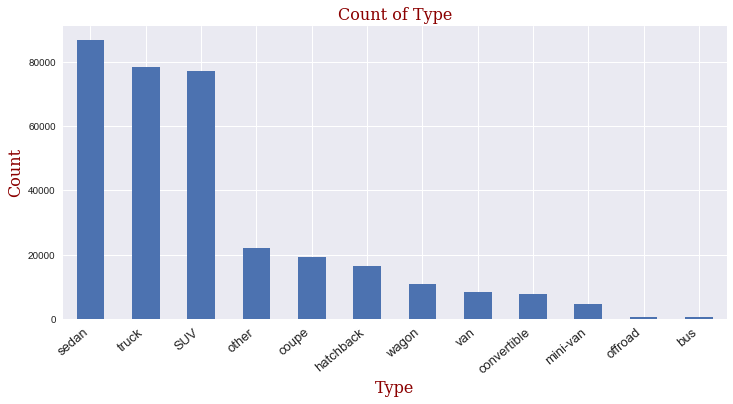

In [51]:
plt.figure(figsize=(10,5))
type_graph = vehicles2.type.value_counts().plot(kind='bar')
type_graph.set_xticklabels(type_graph.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Count of Type', fontdict = font1)
plt.xlabel('Type', fontdict = font1)
plt.ylabel('Count',fontdict = font1)
plt.tick_params(axis='x', which='major', labelsize=13)
plt.show()

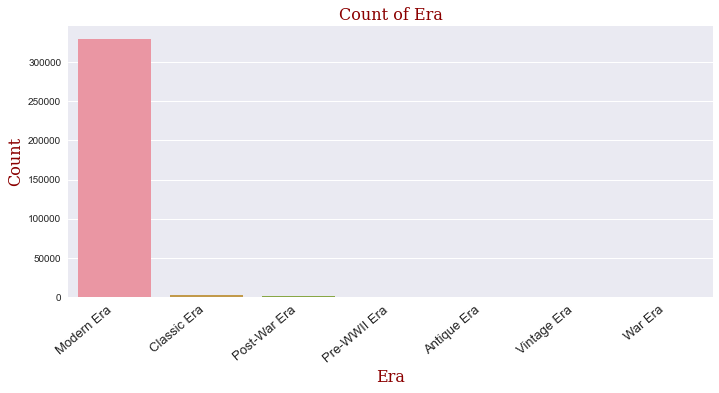

In [64]:
plt.figure(figsize=(10,5))
era_graph = sns.countplot(data=vehicles2, x='Car Era')
era_graph.set_xticklabels(era_graph.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Count of Era', fontdict = font1)
plt.xlabel('Era', fontdict = font1)
plt.ylabel('Count',fontdict = font1)
plt.tick_params(axis='x', which='major', labelsize=13)
plt.show()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,posting_date,Car Era,Car Decade


<AxesSubplot:ylabel='condition'>

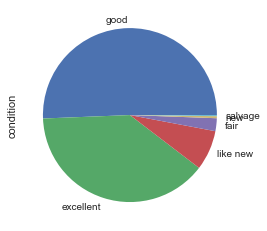

In [53]:
vehicles2['condition'].value_counts().plot(kind='pie')

In [66]:
#vehicles2.to_csv('Used_cars.csv')

In [69]:
vehicles2[(vehicles2['price'] > 100000) & (vehicles2['state'] == 'or')]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,posting_date,Car Era,Car Decade
311451,bend,142997,2018,NaN,Bentley Bentayga Activity Editi,NaN,12 cylinders,gas,30696.0,clean,automatic,SJAAC4ZV5JC019453,4wd,NaN,SUV,NaN,or,2021-04-30 10:05:12-07:00,Modern Era,2010's
311994,bend,129900,2021,ram,1500 trx launch edition 702hp every option #11...,NaN,8 cylinders,gas,175.0,clean,automatic,1C6SRFU97MN900114,4wd,NaN,truck,grey,or,2021-04-26 17:17:45-07:00,Modern Era,2020's
312006,bend,126900,2021,cadillac,escalade esv premium & luxury pkgs rear dvd pa...,NaN,8 cylinders,gas,179.0,clean,automatic,1GYS4LKL1MR272221,4wd,NaN,SUV,grey,or,2021-04-26 17:16:51-07:00,Modern Era,2020's
312013,bend,129900,2020,audi,s8 4.0t twin turbo,NaN,8 cylinders,gas,174.0,clean,automatic,WAU8SAF83LN010185,4wd,NaN,sedan,white,or,2021-04-26 17:16:20-07:00,Modern Era,2020's
312512,bend,142997,2018,NaN,Bentley Bentayga Activity Editi,NaN,12 cylinders,gas,30696.0,clean,automatic,SJAAC4ZV5JC019453,4wd,NaN,SUV,NaN,or,2021-04-23 09:35:30-07:00,Modern Era,2010's
313507,bend,142997,2018,NaN,Bentley Bentayga Activity Editi,NaN,12 cylinders,gas,30696.0,clean,automatic,SJAAC4ZV5JC019453,4wd,NaN,SUV,NaN,or,2021-04-16 08:50:19-07:00,Modern Era,2010's
314352,corvallis/albany,299500,2018,NaN,Lamborghini Aventador,NaN,12 cylinders,gas,3171.0,salvage,automatic,ZHWUV4ZD4JLA07642,4wd,sub-compact,coupe,blue,or,2021-04-20 20:13:14-07:00,Modern Era,2010's
315213,east oregon,123456,1948,NaN,willys jeepster,excellent,8 cylinders,gas,91133.0,clean,manual,C12A190105,rwd,mid-size,convertible,yellow,or,2021-04-22 10:10:27-07:00,Post-War Era,40's
315274,east oregon,229500,2018,ferrari,488 spider,NaN,8 cylinders,gas,7910.0,salvage,automatic,ZFF80AMA9J0233387,rwd,sub-compact,convertible,red,or,2021-04-20 19:26:25-07:00,Modern Era,2010's
316515,eugene,129900,2021,ram,1500 trx launch edition 702hp every option #11...,NaN,8 cylinders,gas,175.0,clean,automatic,1C6SRFU97MN900114,4wd,NaN,truck,grey,or,2021-04-30 13:24:42-07:00,Modern Era,2020's
